In [1]:
colab = False

if colab:
    from google.colab import drive
    drive.mount('/content/gdrive')
    !git clone https://github.com/deepmind/pycolab.git
    !pip install pycolab

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import ActorCritic
import train_agent as train
from importlib import reload

In [3]:
reload(train)

<module 'train_agent' from '/home/nicola/Nicola_unipd/MasterThesis/RelationalDeepRL/train_agent.py'>

In [4]:
game_params = dict(grid_size=12,
                solution_length=[1],
                num_forward = [1], # number of distractors
                num_backward=[0], # just set to 0 for now
                branch_length=1 # length of forward distractors
               )

In [5]:
HPs = dict(action_space=4,
           lr=1e-2,
           gamma=0.99,
           TD=True,
           twin=True,
           n_steps = 3
           )
agent = ActorCritic.BoxWorldA2C(**HPs)

In [5]:
%%time
results = train.train_boxworld(agent, game_params, n_episodes = 10, return_agent=True)
score, asymptotic_score, asymptotic_std, trained_agent, time_profile = results

/usr/local/lib/python3.6/dist-packages/pycolab/ascii_art.py:318: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  art = np.vstack(np.fromstring(line, dtype=np.uint8) for line in art)


Time playing the episode: 1.78 s
Episode 1 - reward: 0
Time updating the agent: 13.66 s
Time playing the episode: 1.06 s
Episode 2 - reward: 0
Time updating the agent: 12.43 s
Time playing the episode: 1.06 s
Episode 3 - reward: 0
Time updating the agent: 12.47 s
Time playing the episode: 1.06 s
Episode 4 - reward: 0
Time updating the agent: 74.13 s
Time playing the episode: 1.03 s
Episode 5 - reward: 0
Time updating the agent: 12.25 s
Time playing the episode: 1.04 s
Episode 6 - reward: 0
Time updating the agent: 12.33 s
Time playing the episode: 1.04 s
Episode 7 - reward: 0
Time updating the agent: 12.29 s
Time playing the episode: 1.04 s
Episode 8 - reward: 0
Time updating the agent: 12.36 s
Time playing the episode: 1.01 s
Episode 9 - reward: 0
Time updating the agent: 12.22 s
Time playing the episode: 1.04 s
Episode 10 - reward: 0
Time updating the agent: 12.25 s
CPU times: user 3min 11s, sys: 5.64 s, total: 3min 16s
Wall time: 3min 17s


In [7]:
time_profile.mean(axis=0)

array([ 1.11658633, 18.63836179])

On my PC:

 Average time for playing an episode: 1.97428691 <br>
 Average time for updating the agent: 26.46678982

 On Colab notebook:

 Average time for playing an episode:  1.11658633 <br>
 Average time for updating the agent: 18.63836179


With GPU

Average time for playing an episode: 0.43020332 <br>
Average time for updating the agent: 0.64481306


In [6]:
%%time
if colab: 
    HPs = dict(action_space=4,
           lr=1e-2,
           gamma=0.99,
           TD=True,
           twin=True,
           n_steps = 3,
           device='cuda'
           )
    agent = ActorCritic.BoxWorldA2C(**HPs)

    results = train.train_boxworld(agent, game_params, n_episodes = 10, return_agent=True)
    score, asymptotic_score, asymptotic_std, trained_agent, time_profile = results

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 12.2 µs


100 episodes (full 120 steps each) = 1h 20 min

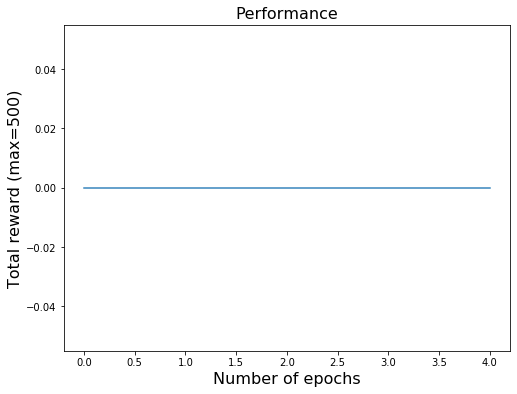

In [0]:
plt.figure(figsize=(8,6))
n_epochs = np.arange(len(score))
plt.plot(n_epochs, score, alpha=0.9)
plt.title("Performance", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Total reward (max=500)", fontsize=16)
plt.show()